<a href="https://colab.research.google.com/github/syedshubha/TeachingQuantumComputing/blob/main/QI_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --quiet cirq qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.5/597.5 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.1/425.1 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 34.8 MB/s eta 0:00:00


In [ ]:
from cirq import *
q0, q1 = LineQubit.range(2)

bell = Circuit(H(q0), CNOT(q0, q1))
print(bell)

0: ───H───@───
          │
1: ───────X───


$|\phi^+ \rangle = \frac{1}{\sqrt{2}}(|00 \rangle+ |11\rangle )$

In [ ]:
bell.append(measure(q0,q1,key="result"))
bell

0: ───H───@───M('result')───
          │   │
1: ───────X───M─────────────

In [ ]:
result = Simulator().run(bell)
print(result)

result=1, 1


In [ ]:
result = Simulator().run(bell, repetitions= 20)
print(result)

result=10011111011110111100, 10011111011110111100


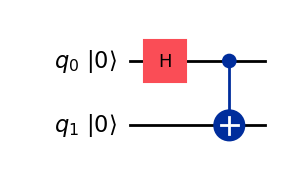

In [ ]:
from qiskit import *
%matplotlib inline
Bell = QuantumCircuit(2)
Bell.h(0)
Bell.cx(0,1)
Bell.draw(output="mpl",initial_state=True)

In [ ]:
Q = QuantumCircuit(1)
Q.h(0)
from qiskit.quantum_info import Operator, Statevector
U = Operator(Q)
from qiskit.visualization import array_to_latex, plot_histogram
array_to_latex(U.data)

<IPython.core.display.Latex object>

In [ ]:
Q = QuantumCircuit(1)
Q.s(0)
array_to_latex(Operator(Q).data)

<IPython.core.display.Latex object>

In [ ]:
Q = QuantumCircuit(2)
Q.cx(0,1)
array_to_latex(Operator(Q).data)

<IPython.core.display.Latex object>

$X\otimes I $

In [ ]:
Q = QuantumCircuit(2)
Q.x(1)
array_to_latex(Operator(Q).data)

<IPython.core.display.Latex object>

In [ ]:
n = 1
Q = QuantumCircuit(n)
Q.x(0)
Q.h(0)
intial = Statevector.from_int(0, 2**n)
state = intial.evolve(Q)
state.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
array_to_latex(state)

<IPython.core.display.Latex object>

In [ ]:
n = 1
Q = QuantumCircuit(n)
Q.initialize([0.6,-0.8], 0)
intial = Statevector.from_int(0, 2**n)
state = intial.evolve(Q)
state.draw('latex')

<IPython.core.display.Latex object>

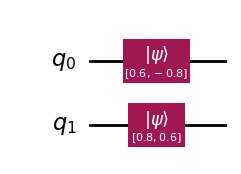

In [ ]:
qc = QuantumCircuit(2)
qc.initialize([0.6, -0.8], 0)
qc.initialize([0.8, 0.6], 1)
qc.draw('mpl')

In [ ]:
intial = Statevector.from_int(0, 4)
state = intial.evolve(qc)
state.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
state = intial.evolve(Bell)
state.draw('latex')

<IPython.core.display.Latex object>

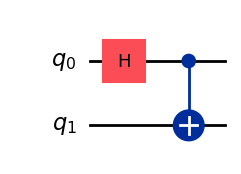

In [ ]:
Bell.draw('mpl')

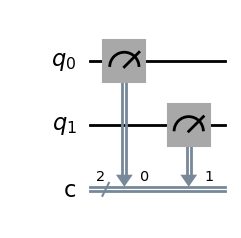

In [ ]:
meas = QuantumCircuit(2,2)
meas.measure([0,1], [0,1])
meas.draw("mpl")

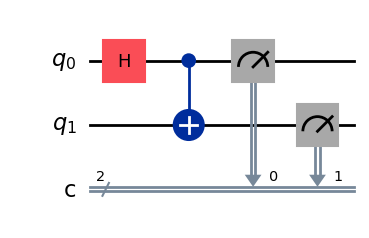

In [ ]:
Bell_M = Bell.compose(meas, [0,1])
Bell_M.draw("mpl")

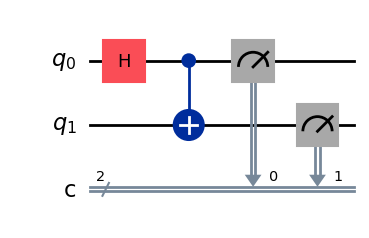

In [ ]:
Bell_M = meas.compose(Bell, [0,1], front=True)
Bell_M.draw("mpl")

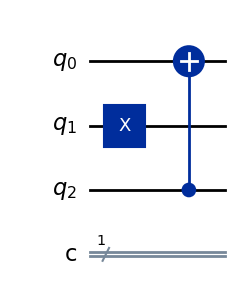

In [ ]:
Emnei = QuantumCircuit(3,1)
Emnei.x(1)
Emnei.cx(2,0)
Emnei.draw("mpl")

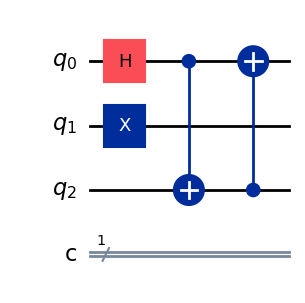

In [ ]:
Hudai = Emnei.compose(Bell, [0,2], front=True)
Hudai.draw("mpl")

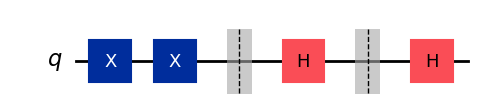

In [ ]:
q = QuantumCircuit(1)
q.x(0)
q.x(0)
q.barrier()
q.h(0)
q.barrier()
q.h(0)
q.draw("mpl")

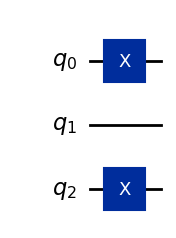

In [ ]:
Q = QuantumCircuit(3)
Q.x([0,2])
Q.draw("mpl")

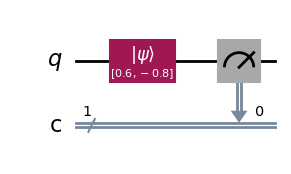

In [ ]:
Q = QuantumCircuit(1,1)
Q.initialize([0.6,-0.8], 0)
Q.measure(0,0)
Q.draw("mpl")

In [ ]:
from qiskit import transpile
from qiskit_aer import AerSimulator
Q_compiled = transpile(Q, AerSimulator())
res = AerSimulator().run(Q_compiled, shots = 10000).result()
counts = res.get_counts(Q_compiled)
print(counts)

{'0': 3576, '1': 6424}


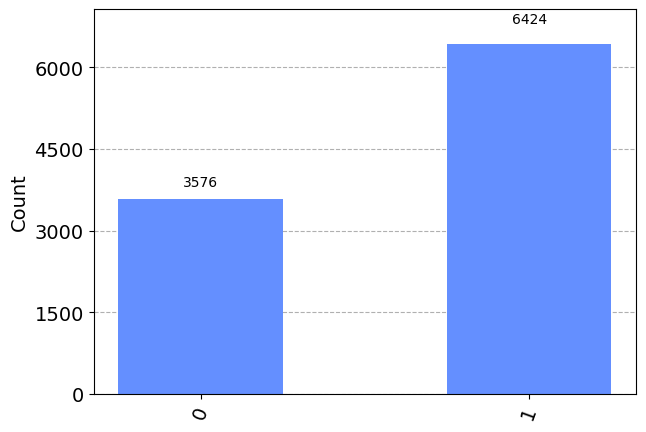

In [ ]:
plot_histogram(counts)

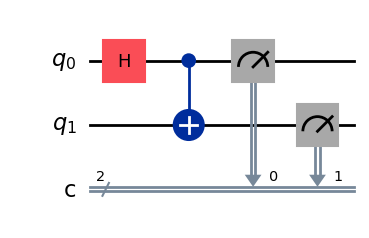

In [ ]:
Bell_M.draw("mpl")

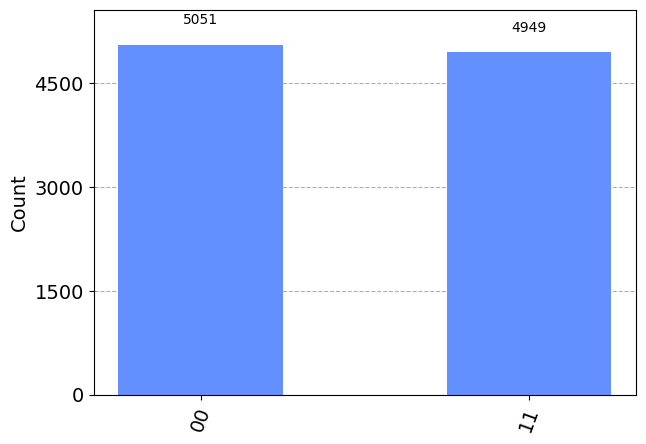

In [ ]:
Q_compiled = transpile(Bell_M, AerSimulator())
res = AerSimulator().run(Q_compiled, shots = 10000).result()
counts = res.get_counts(Q_compiled)
plot_histogram(counts)